#Using a 3D-CNN to Detect Indicators of Tuberculosis (TB) Relapse

Install Dependencies

*   tflearn for the model
*   nibabel to extract data from the compressed medical files (.nii.gz files)



In [7]:
!pip install tflearn
!pip install nibabel

#Data Preprocessing - Make Images 50x50x20 (3D imgs)

In [8]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#import necessary modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import math
import nibabel as nib

#import tensorflow as tf
#depricate tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tflearn
from tensorflow import keras
from tflearn.layers.conv import conv_3d, max_pool_3d
from tflearn.layers.core import input_data, dropout, fully_connected

Enter User Parameters

In [10]:
dataDirectory = 'drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/' #@param
lungPatients = os.listdir(dataDirectory)
labelCSVFile = 'drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TB_y_train.csv' #@param
labels = pd.read_csv(labelCSVFile, index_col=0)
size = 50 #@param
NoSlices = 20 #@param

The following code is modified from: https://github.com/AshwanthRamji/Lung-Cancer-Detection-Using-3D-Convolutional-Neural-Networks
Which is a model proposed in the paper: https://drive.google.com/file/d/15fw8Gd1zrWg8szENRk6FuwVDNPhDUfgo/view


In [11]:
#separate the image slices into chunks so that one image can be taken from each chunk to produce NoSlices images for the model
def chunks(l, n):
    count = 0
    for i in range(0, len(l), n):
        if (count < NoSlices):
            yield l[i:i + n]
            count = count + 1

#take the average of list l
def mean(l):
    return sum(l) / len(l)

#given a file, labels, size, and number of slices, take the given input and format it to be a 50x50x20 format
def dataProcessing(patient_file, labels_df, size=50, noslices=20, visualize=False):
    #label can be 'thick_walls' 'has_calcification' 'foci_around'
    chosen_label = 'thick_walls' #@param

    #decompress the image files
    patient_num = patient_file.rsplit('.')
    label = labels_df.loc[patient_num[0]][chosen_label]
    patient_abs_path = dataDirectory + patient_file
    imgs = nib.load(patient_abs_path)
    slices = []

    #for each image slice in the decompressed file, try to save it into a list called slices
    for slice in range(imgs.shape[2]):
      try:
        slices.append(imgs.get_fdata()[:,:,slice])
      except:
        print('skipped', patient_abs_path)
        return None, -1
    
    #resize the slices to the user input
    new_slices = []
    slices = [cv2.resize(np.array(each_slice), (size, size)) for each_slice in slices]

    #select NoSlices slices according to the user input
    chunk_sizes = math.floor(len(slices) / noslices)
    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)

    #create binary labels for the set of slices and return the data
    if label == 1:
        label = np.array([0, 1])
    elif label == 0:
        label = np.array([1, 0])
    return np.array(new_slices), label

#go through the file path and create data with labels for each of the compressed files
imageData = []
for patient in enumerate(lungPatients):
    #print(patient[1])
    try:
        img_data, label = dataProcessing(patient[1], labels, size=size, noslices=NoSlices)
        #print('img_data', img_data)
        if(not img_data is None):
          imageData.append([img_data, label,patient])
    except KeyError as e:
        print('Data is unlabeled')

#save the uncompressed data with labels
np.save('imageDataNew-{}-{}-{}.npy'.format(size, size, NoSlices), imageData)

Data is unlabeled
skipped drive/MyDrive/Colab Notebooks/Artificial Intelligence/TB_Caverns_Data/TRN_16.nii.gz
Data is unlabeled
Data is unlabeled
Data is unlabeled
Data is unlabeled
Data is unlabeled
Data is unlabeled
Data is unlabeled
Data is unlabeled


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Epoch 1 completed out of 50 loss: 2216681814016.0
Accuracy: 0.9
Epoch 2 completed out of 50 loss: 1258145533952.0
Accuracy: 0.9
Epoch 3 completed out of 50 loss: 632037867776.0
Accuracy: 0.9
Epoch 4 completed out of 50 loss: 1139177777152.0
Accuracy: 0.9
Epoch 5 completed out of 50 loss: 1158849536256.0
Accuracy: 0.9
Epoch 6 completed out of 50 loss: 441836603648.0
Accuracy: 0.9
Epoch 7 completed out of 50 loss: 427697866752.0
Accuracy: 0.9
Epoch 8 completed out of 50 loss: 393325130112.0
Accuracy: 0.8
Epoch 9 completed out of 50 loss: 296639291648.0
Accuracy: 0.9
Epoch 10 completed out of 50 loss: 121242032000.0
Accuracy: 0.9
Epoch 11 completed out of 50 loss: 224834885632.0
Accuracy: 0.8
Epoch 12 completed out of 50 loss: 145301703296.0
Accuracy: 0.9
Epoch 13 completed out of 50 loss: 140222885888.0
Accuracy: 0.8
Epoch 14 completed out of 50 loss: 151464769024.0
Accuracy: 0.9
Epoch 15 completed out of 50 loss: 104216701440.0
Accuracy: 0.7
Epoch 16 completed out of 50 loss: 1610670942

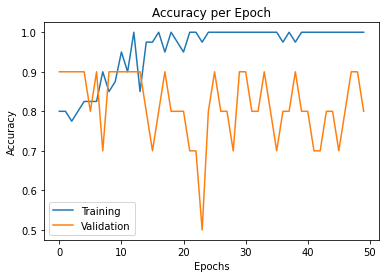

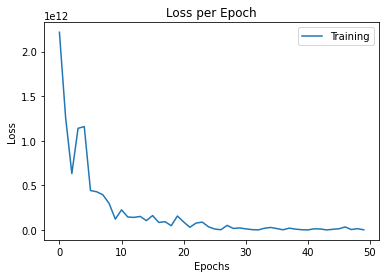

Patient:  (39, 'TRN_54.nii.gz')
Actual:  Not Detected
Predcited:  Detected
Patient:  (40, 'TRN_20.nii.gz')
Actual:  Detected
Predcited:  Detected
Patient:  (41, 'TRN_04.nii.gz')
Actual:  Detected
Predcited:  Detected
Patient:  (42, 'TRN_13.nii.gz')
Actual:  Detected
Predcited:  Detected
Patient:  (43, 'TRN_09.nii.gz')
Actual:  Detected
Predcited:  Detected
Patient:  (44, 'TRN_05.nii.gz')
Actual:  Detected
Predcited:  Detected
Patient:  (45, 'TRN_22.nii.gz')
Actual:  Detected
Predcited:  Detected
Patient:  (46, 'TRN_34.nii.gz')
Actual:  Detected
Predcited:  Detected
Patient:  (47, 'TRN_46.nii.gz')
Actual:  Detected
Predcited:  Detected
Patient:  (48, 'TRN_03.nii.gz')
Actual:  Detected
Predcited:  Detected
Predicted  1
Actual      
0          1
1          9


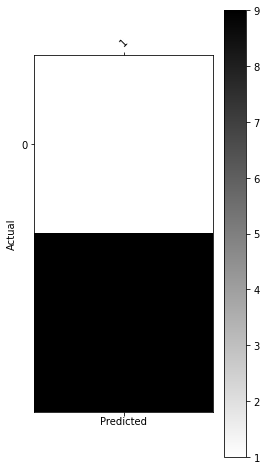

In [12]:
#load the saved image data and split into 40 training, 10 validation, and 10 test
imageData = np.load('imageDataNew-50-50-20.npy', allow_pickle=True)
trainingData = imageData[0:40]
validationData = imageData[-20:-10]
testData = imageData[-10:]

x = tf.placeholder('float')
y = tf.placeholder('float')
keep_rate = 0.8

#define a 3d convolution
def convolution3d(x, W):
    return tf.nn.conv3d(x, W, strides=[1, 1, 1, 1, 1], padding='SAME')

#define a 3d max pool
def maxpooling3d(x):
    return tf.nn.max_pool3d(x, ksize=[1, 2, 2, 2, 1], strides=[1, 2, 2, 2, 1], padding='SAME')

#define the 3d-cnn architecture with 5 convolutions and fc layers
def cnn(x):
    x = tf.reshape(x, shape=[-1, size, size, NoSlices, 1])
    convolution1 = tf.nn.relu(
        convolution3d(x, tf.Variable(tf.random_normal([3, 3, 3, 1, 32]))) + tf.Variable(tf.random_normal([32])))
    convolution1 = maxpooling3d(convolution1)
    convolution2 = tf.nn.relu(
        convolution3d(convolution1, tf.Variable(tf.random_normal([3, 3, 3, 32, 64]))) + tf.Variable(
            tf.random_normal([64])))
    convolution2 = maxpooling3d(convolution2)
    convolution3 = tf.nn.relu(
        convolution3d(convolution2, tf.Variable(tf.random_normal([3, 3, 3, 64, 128]))) + tf.Variable(
            tf.random_normal([128])))
    convolution3 = maxpooling3d(convolution3)
    convolution4 = tf.nn.relu(
        convolution3d(convolution3, tf.Variable(tf.random_normal([3, 3, 3, 128, 256]))) + tf.Variable(
            tf.random_normal([256])))
    convolution4 = maxpooling3d(convolution4)
    convolution5 = tf.nn.relu(
        convolution3d(convolution4, tf.Variable(tf.random_normal([3, 3, 3, 256, 512]))) + tf.Variable(
            tf.random_normal([512])))
    convolution5 = maxpooling3d(convolution4)
    fullyconnected = tf.reshape(convolution5, [-1, 1024])
    fullyconnected = tf.nn.relu(
        tf.matmul(fullyconnected, tf.Variable(tf.random_normal([1024, 1024]))) + tf.Variable(tf.random_normal([1024])))
    fullyconnected = tf.nn.dropout(fullyconnected, keep_rate)
    output = tf.matmul(fullyconnected, tf.Variable(tf.random_normal([1024, 2]))) + tf.Variable(tf.random_normal([2]))
    return output

#train and test the network
def network(x):
    #dictionaries to save the validation and test accuracy and loss per epoch for a graph
    val_accuracy_dict = {}
    train_accuracy_dict = {}
    train_loss_dict = {}
    val_loss_dict = {}

    #make an instance of the 3d-cnn architecture
    prediction = cnn(x)

    #the loss function is sigmoid_cross_entropy and the optimizer is adam - this has been modified from the original code
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=prediction, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)
    epochs = 50

    #train the model
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        #calculate the loss per epoch
        for epoch in range(epochs):
            epoch_loss = 0
            for data in trainingData:
                try:
                    X = data[0]
                    Y = data[1]
                    _, c = session.run([optimizer, cost], feed_dict={x: X, y: Y})
                    epoch_loss += c
                except Exception as e:
                    pass

            #calculate and print the accuracy and print the loss per epoch for the model
            correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
            print('Epoch', epoch + 1, 'completed out of', epochs, 'loss:', epoch_loss)
            train_loss_dict[epoch] = epoch_loss
            val_accuracy_dict[epoch] = accuracy.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]})
            train_accuracy_dict[epoch] = accuracy.eval({x: [i[0] for i in trainingData], y: [i[1] for i in trainingData]})
            print('Accuracy:', accuracy.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]}))
        print('Final Accuracy:', accuracy.eval({x: [i[0] for i in validationData], y: [i[1] for i in validationData]}))
        patients = []
        actual = []
        predicted = []

        #plot the training and validation loss and accuracy
        plt.plot(list(train_accuracy_dict.keys()), list(train_accuracy_dict.values()))
        plt.plot(list(val_accuracy_dict.keys()), list(val_accuracy_dict.values()))
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Accuracy per Epoch')
        plt.legend(['Training', 'Validation'])
        plt.show()

        plt.plot(list(train_loss_dict.keys()), list(train_loss_dict.values()))
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss per Epoch')
        plt.legend(['Training'])
        plt.show()

        #make predictions on the test dataset
        finalprediction = tf.argmax(prediction, 1)
        actualprediction = tf.argmax(y, 1)
        for i in range(len(validationData)):
            patients.append(validationData[i][2])
        for i in finalprediction.eval({x: [i[0] for i in testData], y: [i[1] for i in testData]}):
            if(i==1):
                predicted.append("Detected")
            else:
                predicted.append("Not Detected")
        for i in actualprediction.eval({x: [i[0] for i in testData], y: [i[1] for i in testData]}):
            if(i==1):
                actual.append("Detected")
            else:
                actual.append("Not Detected")
        
        #print out each prediction and result
        for i in range(len(patients)):
            print("Patient: ",patients[i])
            print("Actual: ", actual[i])
            print("Predcited: ", predicted[i])

        #show the results from the test predictions with a confusion matrix
        from sklearn.metrics import confusion_matrix
        y_actual = pd.Series(
            (actualprediction.eval({x: [i[0] for i in testData], y: [i[1] for i in testData]})),
            name='Actual')
        y_predicted = pd.Series(
            (finalprediction.eval({x: [i[0] for i in testData], y: [i[1] for i in testData]})),
            name='Predicted')
        df_confusion = pd.crosstab(y_actual, y_predicted)
        print(df_confusion)

        def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):\
            
            plt.matshow(df_confusion, cmap=cmap)  
            plt.colorbar()
            tick_marks = np.arange(len(df_confusion.columns))
            plt.xticks(tick_marks, df_confusion.columns, rotation=45)
            plt.yticks(tick_marks, df_confusion.index)
            plt.ylabel(df_confusion.index.name)
            plt.xlabel(df_confusion.columns.name)
            plt.show()
        plot_confusion_matrix(df_confusion)

#train a network on the data labeled x (x includes train, test, and validation data and will be split within the network function)
network(x)